# PimaIndian 피마 인디언 당뇨병 예측

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [41]:
seed = 2021 # 할때마다 동일한 결과를 내기 위해 seed 값 지정함
np.random.seed(seed)
tf.random.set_seed(seed)

## 1. 데이터 셋 만들기

In [42]:
df = pd.read_csv('dataset/pima-indians-diabetes.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(  
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify = df.iloc[:,-1], random_state = seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

## 모델 정의 / 설정 / 학습 / 평가

- ### 12/8/1 layer, 200 epochs

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(12,input_shape=(8, ), activation ='relu' ) ) # Hidden Layer 1 
model.add(Dense(8, activation ='relu' ) )  # Hidden Layer 2
model.add(Dense(1, activation= 'sigmoid') ) # Output layer
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(
loss = 'binary_crossentropy', #이진분류의 loss 함수는 binary_crossentropy, 범주형분류는 categorycal_crossentropy
optimizer = 'adam',
metrics = ['accuracy']
)

In [47]:
# 모델학습
history = model.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 200, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

In [48]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:4f}')

6/6 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7448
정확도: 0.744792


### - 30/1, rmsprop, 100 epochs

In [49]:
model2 = Sequential()
model2.add(Dense(30,input_shape=(8, ), activation ='relu' ) ) # Hidden Layer 1 
model2.add(Dense(1, activation= 'sigmoid') ) # Output layer
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [50]:
model2.compile(
    loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']
)

In [51]:
# 모델학습
history2 = model2.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 100, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 1
    )

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 43.5360 - accuracy: 0.3326 - val_loss: 30.3869 - val_accuracy: 0.4138
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 30.3665 - accuracy: 0.3348 - val_loss: 20.9488 - val_accuracy: 0.4138
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 19.7486 - accuracy: 0.3413 - val_loss: 11.9332 - val_accuracy: 0.4310
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 10.1816 - accuracy: 0.3783 - val_loss: 5.0479 - val_accuracy: 0.5086
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 3.9305 - accuracy: 0.5413 - val_loss: 2.6984 - val_accuracy: 0.5603
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 2.3396 - accuracy: 0.5739 - val_loss: 2.4000 - val_accuracy: 0.5517
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 2.1098 - accuracy: 0.5783 - val_loss: 2.3204 - val_accuracy: 0.5000
Epoch

In [52]:
acc = model2.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:4f}')

6/6 [==============================] - 0s 1ms/step - loss: 0.7539 - accuracy: 0.6927
정확도: 0.692708


### - 24/12/8/1 layers, 200 epochs

In [53]:
model3 = Sequential()
model3.add(Dense(24, input_shape=(8,), activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_20 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [54]:
model3.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [55]:
history3 = model3.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

Epoch 1/200
10/10 - 0s - loss: 10.5444 - accuracy: 0.3326 - val_loss: 6.8493 - val_accuracy: 0.4138
Epoch 2/200
10/10 - 0s - loss: 6.6367 - accuracy: 0.3348 - val_loss: 3.7411 - val_accuracy: 0.4224
Epoch 3/200
10/10 - 0s - loss: 3.2617 - accuracy: 0.3457 - val_loss: 1.6477 - val_accuracy: 0.4224
Epoch 4/200
10/10 - 0s - loss: 1.5858 - accuracy: 0.4087 - val_loss: 1.1279 - val_accuracy: 0.4569
Epoch 5/200
10/10 - 0s - loss: 1.0471 - accuracy: 0.5435 - val_loss: 0.9885 - val_accuracy: 0.5603
Epoch 6/200
10/10 - 0s - loss: 0.8512 - accuracy: 0.6348 - val_loss: 0.7958 - val_accuracy: 0.5345
Epoch 7/200
10/10 - 0s - loss: 0.7630 - accuracy: 0.6152 - val_loss: 0.7620 - val_accuracy: 0.5259
Epoch 8/200
10/10 - 0s - loss: 0.7297 - accuracy: 0.6174 - val_loss: 0.7272 - val_accuracy: 0.5690
Epoch 9/200
10/10 - 0s - loss: 0.7092 - accuracy: 0.6217 - val_loss: 0.7099 - val_accuracy: 0.5948
Epoch 10/200
10/10 - 0s - loss: 0.6967 - accuracy: 0.6457 - val_loss: 0.7150 - val_accuracy: 0.5776
Epoch 11

In [56]:
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 831us/step - loss: 0.5563 - accuracy: 0.7448


[0.5562655329704285, 0.7447916865348816]

## MinMaxScaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, 
    stratify=df.iloc[:,-1].values, random_state=seed
)

In [59]:
model4 = Sequential()
model4.add(Dense(12, input_dim=8, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [60]:
model4.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [61]:
history4 = model4.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

Epoch 1/200
10/10 - 0s - loss: 0.6904 - accuracy: 0.5935 - val_loss: 0.6850 - val_accuracy: 0.6034
Epoch 2/200
10/10 - 0s - loss: 0.6799 - accuracy: 0.6522 - val_loss: 0.6820 - val_accuracy: 0.5862
Epoch 3/200
10/10 - 0s - loss: 0.6691 - accuracy: 0.6696 - val_loss: 0.6806 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6620 - accuracy: 0.6696 - val_loss: 0.6809 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6554 - accuracy: 0.6674 - val_loss: 0.6821 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6523 - accuracy: 0.6674 - val_loss: 0.6832 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6493 - accuracy: 0.6674 - val_loss: 0.6832 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6479 - accuracy: 0.6674 - val_loss: 0.6842 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6456 - accuracy: 0.6674 - val_loss: 0.6840 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6440 - accuracy: 0.6674 - val_loss: 0.6840 - val_accuracy: 0.5862
Epoch 11/

In [62]:
model4.evaluate(X_test,y_test)
# 스케일링 하자!!! 

6/6 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7812


[0.4545283317565918, 0.78125]

## 시각화

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']
x_len = np.arange(len(y_acc))

#epoch 늘릴수록 accuracy는 계속 좋아지나, valiation_loss 값은 낮아지다가 다시 약간 증가하는 형태를 지닌다.
# 따라서 epochs 가 크되, valiation loss 값이 최소일때 학습을 끊어야한다!! 

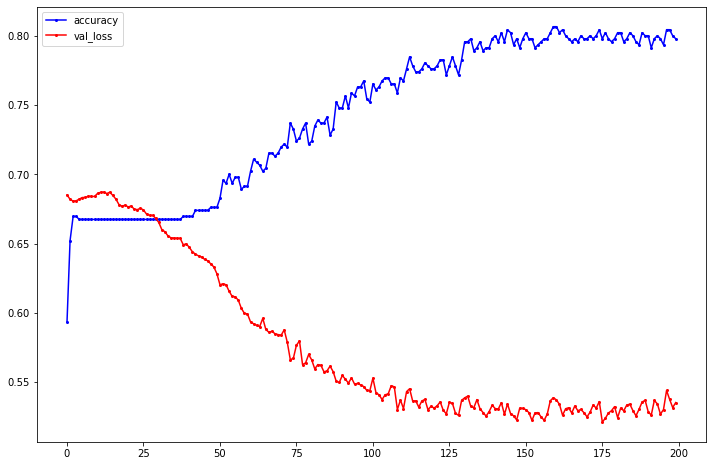

In [65]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()